# From:

[Course][course] | [Video][video]

[course]: https://www.computervision.zone/courses/learn-opencv-in-3-hours/ "Course"
[video]: https://youtu.be/WQeoO7MI0Bs?list=TLPQMTEwMzIwMjMw0BVkrXqfrA "Video"


# Chapter 1

---


In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
# DISPLAY
lib.show_images(["Resources/lena.png", "Lena"])


In [ ]:
# DISPLAY VIDEO FILE

video_path = "Resources/test_video.mp4"
video_title = "Test Video"

lib.show_video([video_path, video_title])


In [ ]:
# DISPLAY LIVE VIDEO
lib.show_video()


# Chapter 2
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import numpy as np

img = cv2.imread("Resources/lena.png")
kernel = np.ones((5, 5), np.uint8)

imgGrayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgGaussianBlur = cv2.GaussianBlur(imgGrayscale, (7, 7), 0)
imgMedianBlur = cv2.medianBlur(imgGrayscale, 3)
imgCanny = cv2.Canny(img, 150, 200)
imgDialation = cv2.dilate(imgCanny, kernel, iterations=1)
imgEroded = cv2.erode(imgDialation, kernel, iterations=1)

images = [
    [img, "Original Image"],
    [imgGrayscale, "Grayscale Image"],
    [imgGaussianBlur, "GaussianBlur Image"],
    [imgMedianBlur, "MedianBlur Image"],
    [imgCanny, "Canny Image"],
    [imgDialation, "Dialation Image"],
    [imgEroded, "Eroded Image"]
]


lib.show_images(images)


# Chapter 3
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import numpy as np

img = cv2.imread("Resources/shapes.png")
print(img.shape)

imgResize = cv2.resize(img, (1000, 500))
print(imgResize.shape)

imgCropped = img[46:119, 352:495]

images = [[img, "Original Image"], [imgResize, "Resized Image"], [imgCropped, "Cropped Image"]]

lib.show_images(images)


# Chapter 4
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import numpy as np

img = np.zeros((512, 512, 3), np.uint8)
# print(img)
# img[:]= 255,0,0

cv2.line(img, (0, 0), (img.shape[1], img.shape[0]), (0, 255, 0), 3)
cv2.rectangle(img, (0, 0), (250, 350), (0, 0, 255), 2)
cv2.circle(img, (400, 50), 30, (255, 255, 0), 5)
cv2.putText(img, " OPENCV  ", (300, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 150, 0), 3)

lib.show_images(img)


# Chapter 5
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import numpy as np

img = cv2.imread("Resources/cards.jpg")

width, height = 250, 350
pts1 = np.float32([[111, 219], [287, 188], [154, 482], [352, 440]])
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imgOutput = cv2.warpPerspective(img, matrix, (width, height))

images = [[img, "Original Image"], [imgOutput, "Output Image"]]
lib.show_images(images)


# Chapter 6
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import itertools
import numpy as np


def stackImages(scale, imgArray):
    rows = len(imgArray)
    rowsAvailable = isinstance(imgArray[0], list)
    if rowsAvailable:
        return stackRows(imgArray, rows, scale)
    else:
        return stackColumns(imgArray, rows, scale)


def stackColumns(imgArray, rows, scale):
    for x in range(rows):
        imgArray[x] = (
            cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]
            else cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
        )
        if len(imgArray[x].shape) == 2:
            imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
    return np.hstack(imgArray)


def stackRows(imgArray, rows, scale):
    columns = len(imgArray[0])
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    for x, y in itertools.product(range(rows), range(columns)):
        imgArray[x][y] = (
            cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
            if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]
            else cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
        )
        if len(imgArray[x][y].shape) == 2:
            imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
    imageBlank = np.zeros((height, width, 3), np.uint8)
    horizontal = [imageBlank] * rows
    for x in range(rows):
        horizontal[x] = np.hstack(imgArray[x])
    return np.vstack(horizontal)


img = cv2.imread('Resources/lena.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgGrayColored = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2BGR)

imgHor = np.hstack((img, imgGrayColored, img))
imgVer = np.vstack((img, imgGrayColored, img))

imgStack = stackImages(0.5, ([img, img, img], [img, imgGray, img], [img, img, img]))


lib.show_images([img, "Original"])
lib.show_images([imgHor, "Horizontal"])
lib.show_images([imgVer, "Vertical"])
lib.show_images([imgStack, "Stacked"])


In [ ]:
import cv2

img = cv2.imread('Resources/lena.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

images = [
    [img, img, img],
    [img, imgGray, img],
    [img, img, img]
]


lib.show_images(images)


# Chapter 7
---

In [ ]:
import sys

sys.path.append('../')

import lib


In [ ]:
import cv2
import itertools
import numpy as np


def empty(a):
    pass


def stackImages(scale, imgArray):
    rows = len(imgArray)
    rowsAvailable = isinstance(imgArray[0], list)
    if rowsAvailable:
        return stackRows(imgArray, rows, scale)
    else:
        return stackColumns(imgArray, rows, scale)


def stackColumns(imgArray, rows, scale):
    for x in range(rows):
        imgArray[x] = (
            cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]
            else cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
        )
        if len(imgArray[x].shape) == 2:
            imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
    return np.hstack(imgArray)


def stackRows(imgArray, rows, scale):
    columns = len(imgArray[0])
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    for x, y in itertools.product(range(rows), range(columns)):
        imgArray[x][y] = (
            cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
            if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]
            else cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
        )
        if len(imgArray[x][y].shape) == 2:
            imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
    imageBlank = np.zeros((height, width, 3), np.uint8)
    horizontal = [imageBlank] * rows
    for x in range(rows):
        horizontal[x] = np.hstack(imgArray[x])
    return np.vstack(horizontal)


path = 'Resources/lambo.png'
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars", 640, 240)
cv2.createTrackbar("Hue Min", "TrackBars", 0, 179, empty)
cv2.createTrackbar("Hue Max", "TrackBars", 19, 179, empty)
cv2.createTrackbar("Sat Min", "TrackBars", 110, 255, empty)
cv2.createTrackbar("Sat Max", "TrackBars", 240, 255, empty)
cv2.createTrackbar("Val Min", "TrackBars", 153, 255, empty)
cv2.createTrackbar("Val Max", "TrackBars", 255, 255, empty)

while True:
    img = cv2.imread(path)
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min, h_max, s_min, s_max, v_min, v_max)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(imgHSV, lower, upper)
    imgResult = cv2.bitwise_and(img, img, mask=mask)

    # cv2.imshow("Original",img)
    # cv2.imshow("HSV",imgHSV)
    # cv2.imshow("Mask", mask)
    # cv2.imshow("Result", imgResult)

    imgStack = stackImages(0.6, ([img, imgHSV], [mask, imgResult]))
    cv2.imshow("Stacked Images", imgStack)

    cv2.waitKey(1)


# Chapter 8
---

In [6]:
import sys

sys.path.append('../')

import lib
from lib import filler_image as fimg


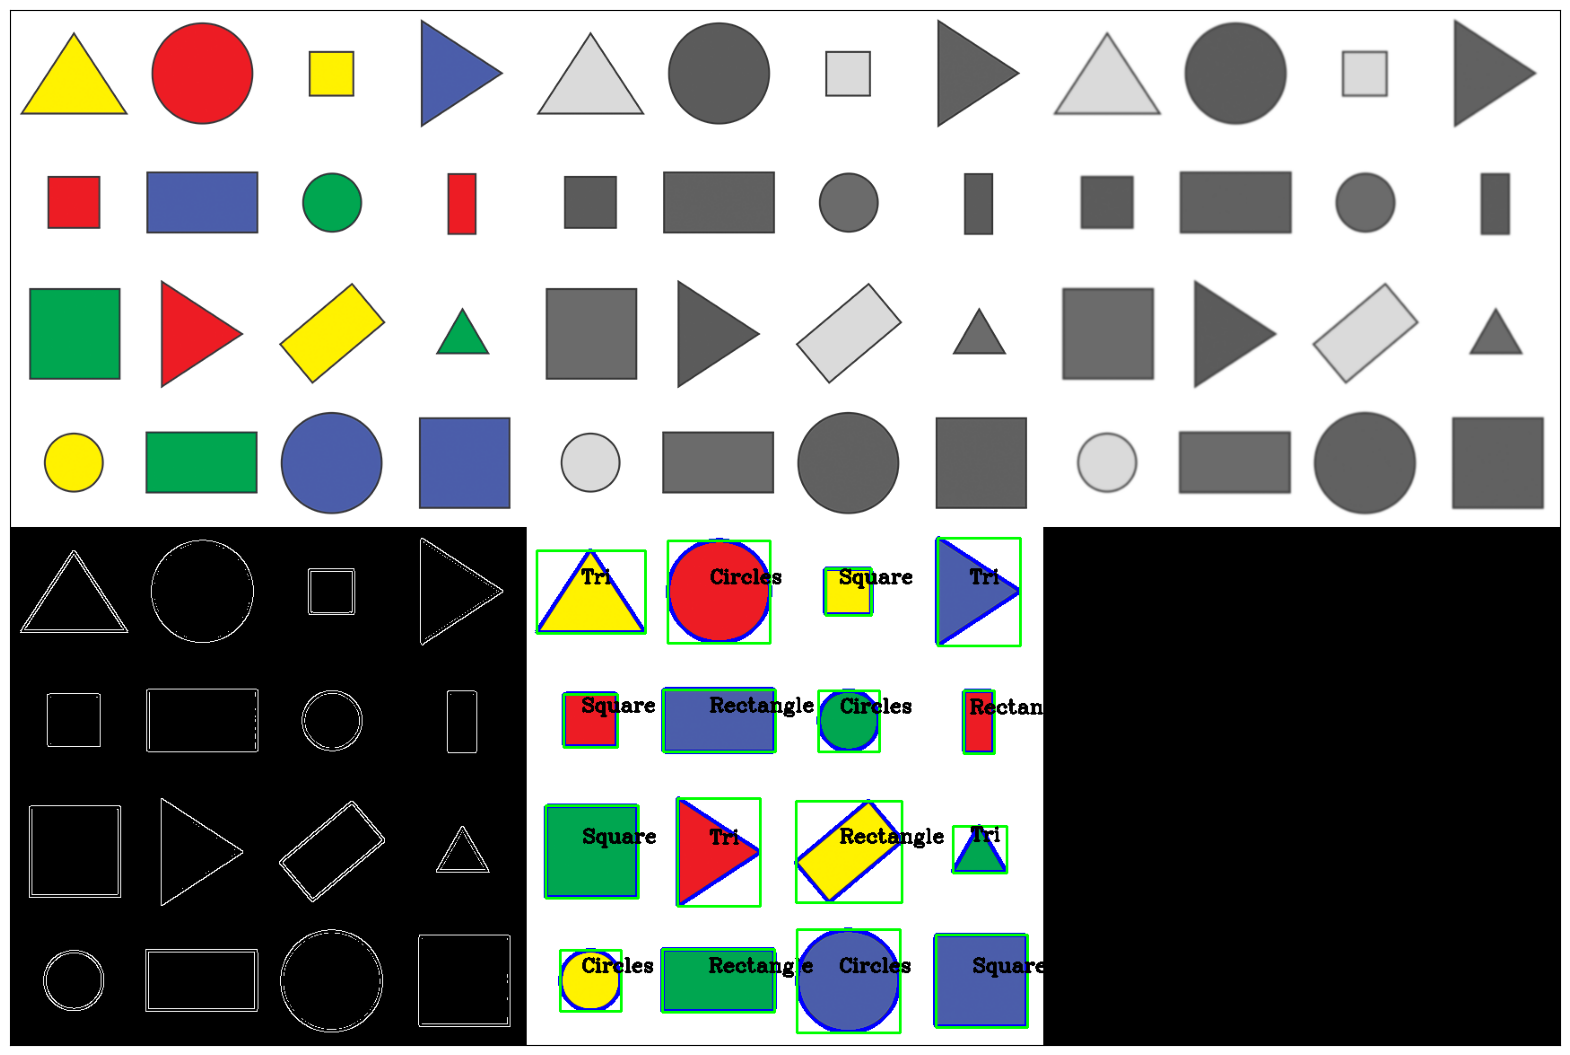

In [7]:
import cv2
import numpy as np


def getContours(img):
    contours, _hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        # print(area)
        if area > 500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt, True)
            # print(peri)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            # print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)

            if objCor == 3:
                objectType = "Tri"
            elif objCor == 4:
                aspRatio = w / float(h)
                objectType = "Square" if aspRatio > 0.98 and aspRatio < 1.03 else "Rectangle"
            elif objCor > 4:
                objectType = "Circles"
            else:
                objectType = "None"

            cv2.rectangle(imgContour, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(imgContour, objectType,
                        (x + (w // 2) - 10, y + (h // 2) - 10),
                        cv2.FONT_HERSHEY_COMPLEX, 0.7,
                        (0, 0, 0),
                        2)


path = 'Resources/shapes.png'
img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7, 7), 1)
imgCanny = cv2.Canny(imgBlur, 50, 50)
getContours(imgCanny)

imgBlank = np.zeros_like(img)
imagesStack = [
    [img, imgGray, imgBlur],
    [imgCanny, imgContour, fimg(img, 0)]
]

lib.show_images(imagesStack, figsize=(20, 20))


# Chapter 9
---

In [ ]:
import sys

sys.path.append('../')

import lib
